<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/05_hadamardGateOnState0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.1 MB/s 
     |████████████████████████████████| 19.2 MB 1.4 MB/s 
     |████████████████████████████████| 240 kB 32.9 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 112 kB 44.5 MB/s 
     |████████████████████████████████| 943 kB 43.0 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 37.5 MB 48 kB/s 
     |████████████████████████████████| 4.0 MB 40.2 MB/s 
     |████████████████████████████████| 1.9 MB 41.4 MB/s 
     |████████████████████████████████| 112 kB 49.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.38.0-py3-none-any.whl size=12147 sha256=85dae90ce5d046cc723af8a5d0aa17eb89db86909549df96c6897b54a55737c1
  Stored in directory: /root/.cache/pip/wheels/0b/30/78/04c91b

In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.6 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=aeb0f9eaa41238b42a828e0bf24f2fbd821bf6f4101d30ab8113e57bdf1303f3
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

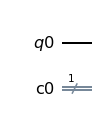

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
from qiskit.visualization import plot_state_qsphere

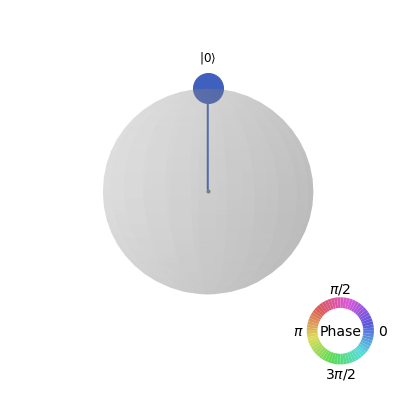

In [ ]:
plot_state_qsphere(qc)

In [ ]:
from qiskit.quantum_info import DensityMatrix

In [ ]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

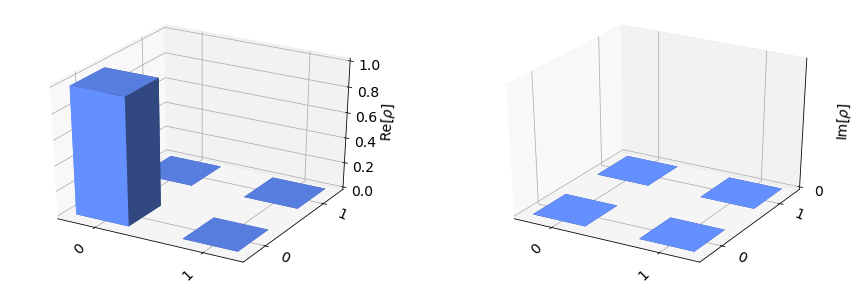

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

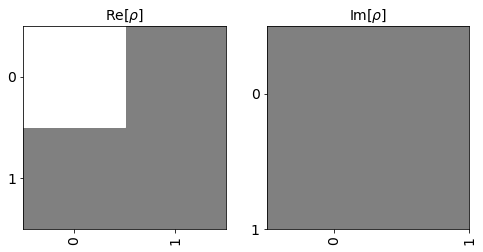

In [ ]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

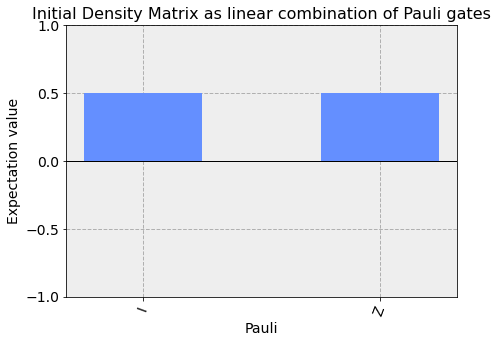

In [ ]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

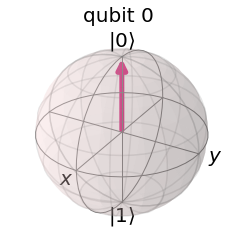

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [ ]:
purity = rho1.purity()
print(purity)

(1+0j)


In [ ]:
qc.h(q[0])

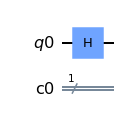

In [ ]:
qc.draw('mpl')

In [ ]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

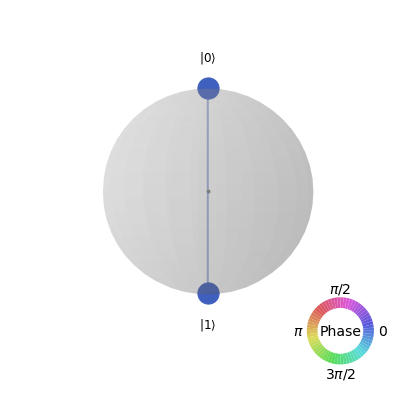

In [ ]:
plot_state_qsphere(qc)

In [ ]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

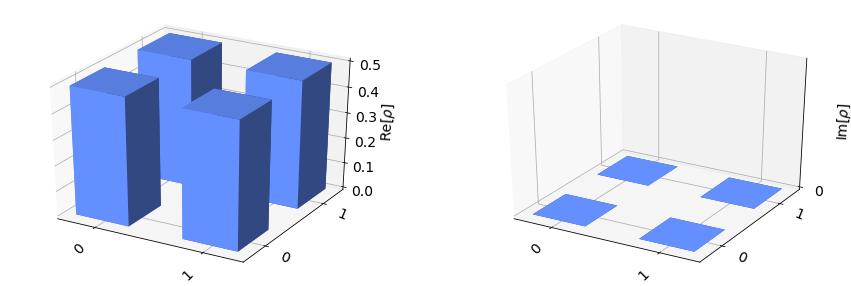

In [ ]:
plot_state_city(qc)

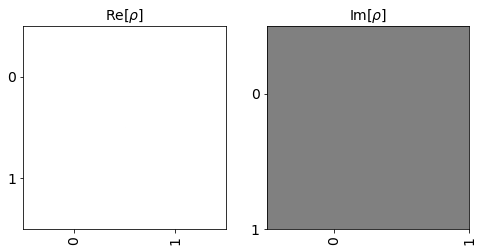

In [ ]:
plot_state_hinton(qc)

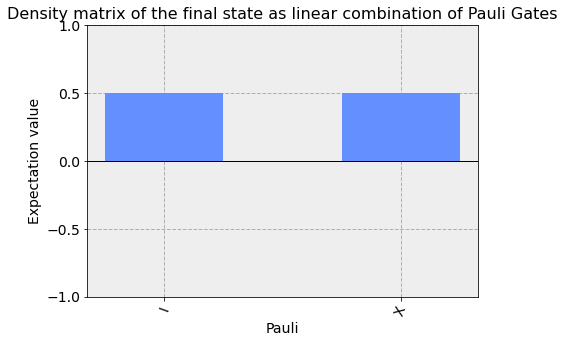

In [ ]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

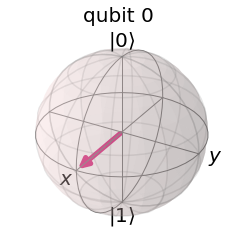

In [ ]:
plot_bloch_multivector(qc)

In [ ]:
purityf = rho2.purity()
print(purityf)

(0.9999999999999996+0j)


In [ ]:
from qiskit.quantum_info import state_fidelity

In [ ]:
fidelity = state_fidelity(psi1,psi2)
print(fidelity)

0.4999999999999999


In [ ]:
fidelity = state_fidelity(rho1,rho2)
print(fidelity)

0.5000000000000002


In [ ]:
qc.measure(q[0],c[0])

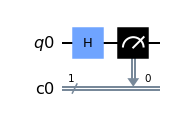

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 504, '1': 520}


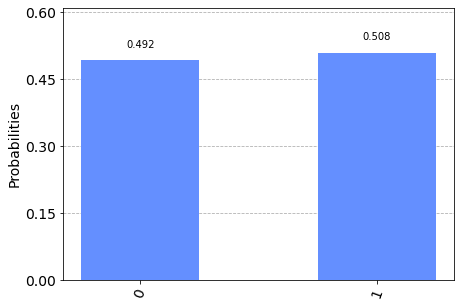

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)